# MDATA DATASET
Using the above dataset to build a Model using Multinomial Regression model to predict which program the student will select. 

## BUSINESS OBJECTIVE
* Maximize Admission
* Maximize University Reputation
* Minimize attrition
* Maximize Quality
* Maximize placements

## CONSTRAINTS
* Pandemic
* Lockdowns
* High competition

## DATA DICTIONARY

| **slno** |      **Name of Feature**     | **Description**                                                          | **Type** | **Relevance** |
|:--------:|:----------------------------|:--------------------------------------------------------------------------|:--------:|:-------------:|
| 1 | Unnamed: 0   | Column of Index numbers          | Count     | Irrelevant      |
| 2 | id     | Id of the Student  | Nominal     | Irrelevant      |
| 3 | female         | Gender of the student: Male or Female          | Binary    | Relevant      |
| 4 | ses     | Socioeconomic Status of the student: low, middle or high    | Ordinal    | Relevant      |
| 5 | schtyp        | scholarship type: public or private        | Binary    | Relevant      |
| 6 | prog      | Type of program: vocation, general or Academic        | Nominal    | Relevant      |
| 7 | read       | Reading score  | Ratio     | Relevant      |
| 8 | write       | Writing score      | Ratio     | Relevant      |
| 9 | math      | Math score           | Ratio     | Relevant      |
| 10 | science       | Science score          | Ratio    | Relevant      |
| 11 | honors    | Student enrolled for honours: enrolled or not-enrolled     | Binary    | Relevant      |

Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from termcolor import colored
from sklearn.model_selection import train_test_split

Loading the dataset using the pandas library and confirming the dataset has been loaded properly using the 'head' function

In [2]:
df0 = pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass24\mdata.csv")
df=df0.copy()
df.head()

,Unnamed: 0,id,female,ses,schtyp,prog,read,write,math,science,honors
0,1,45,female,low,public,vocation,34,35,41,29,not enrolled
1,2,108,male,middle,public,general,34,33,41,36,not enrolled
2,3,15,male,high,public,vocation,39,39,44,26,not enrolled
3,4,67,male,low,public,vocation,37,37,42,33,not enrolled
4,5,153,male,middle,public,vocation,39,31,40,39,not enrolled


Dropping the columns which are not relevant for the prediction model.

In [3]:
df.drop(['Unnamed: 0','id'],axis=1,inplace=True)
df.head()

,female,ses,schtyp,prog,read,write,math,science,honors
0,female,low,public,vocation,34,35,41,29,not enrolled
1,male,middle,public,general,34,33,41,36,not enrolled
2,male,high,public,vocation,39,39,44,26,not enrolled
3,male,low,public,vocation,37,37,42,33,not enrolled
4,male,middle,public,vocation,39,31,40,39,not enrolled


### EXPLORATORY DATA ANALYSIS & FEATURE ENGINEERING

The below three lines give a general idea about the dataset like the shape, type and non null values.

In [4]:
df.shape

(200, 9)

In [5]:
df.dtypes

female     object
ses        object
schtyp     object
prog       object
read        int64
write       int64
math        int64
science     int64
honors     object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   female   200 non-null    object
 1   ses      200 non-null    object
 2   schtyp   200 non-null    object
 3   prog     200 non-null    object
 4   read     200 non-null    int64 
 5   write    200 non-null    int64 
 6   math     200 non-null    int64 
 7   science  200 non-null    int64 
 8   honors   200 non-null    object
dtypes: int64(4), object(5)
memory usage: 14.2+ KB


The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [7]:
df.describe()

,read,write,math,science
count,200.000000,200.000000,200.000000,200.000000
mean,52.230000,52.775000,52.645000,51.850000
std,10.252937,9.478586,9.368448,9.900891
min,28.000000,31.000000,33.000000,26.000000
25%,44.000000,45.750000,45.000000,44.000000
50%,50.000000,54.000000,52.000000,53.000000
75%,60.000000,60.000000,59.000000,58.000000
max,76.000000,67.000000,75.000000,74.000000


Checking the Number of Duplicates in the Dataset.

In [8]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(colored(' Number of Duplicate values: ','blue',attrs=['bold']),duplicate_values)

 Number of Duplicate values:  0


Checking the Number and Percentage of Missing Values in the Dataset.

In [9]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 female     0
ses        0
schtyp     0
prog       0
read       0
write      0
math       0
science    0
honors     0
dtype: int64


In [10]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 female      2
ses         3
schtyp      2
prog        3
read       30
write      29
math       40
science    34
honors      2
dtype: int64


Rearranging the variables in the datset. 

In [11]:
df=df.loc[:,['prog','female', 'ses', 'schtyp', 'read', 'write', 'math', 'science','honors']]
df.head()

,prog,female,ses,schtyp,read,write,math,science,honors
0,vocation,female,low,public,34,35,41,29,not enrolled
1,general,male,middle,public,34,33,41,36,not enrolled
2,vocation,male,high,public,39,39,44,26,not enrolled
3,vocation,male,low,public,37,37,42,33,not enrolled
4,vocation,male,middle,public,39,31,40,39,not enrolled


### First Moment Business Decision or Measures of Central Tendency.
* It gives the mean, median and mode values of the dataset.
* Mean is the average of the data and it easily gets influenced by the outliers.
* Median is the middle most value of the dataset.
* Mode is the most repeated value of the dataset.
* If the mean, median & mode are same then the data has normal distribution otherwise the distribution is not normal.

In [12]:
df.mean()

C:\Users\lenny\AppData\Local\Temp\ipykernel_24780\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


read       52.230
write      52.775
math       52.645
science    51.850
dtype: float64

In [13]:
df.median()

C:\Users\lenny\AppData\Local\Temp\ipykernel_24780\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


read       50.0
write      54.0
math       52.0
science    53.0
dtype: float64

In [14]:
stats.mode(df)

C:\Users\lenny\AppData\Local\Temp\ipykernel_24780\4235401754.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(df)
C:\Users\lenny\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\lenny\AppData\Local\Temp\ipykernel_24780\4235401754.py:1: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/r

ModeResult(mode=array([['academic', 'female', 'middle', 'public', 47, 59, 57, 50,
        'not enrolled']], dtype=object), count=array([[105, 109,  95, 168,  27,  25,  13,  21, 147]]))

### Second Moment Business Decision or Measures of Dispersion
* It contains Variance, Standard Deviation & Range.
* It gives a general idea about the spread of data in the dataset.
* Variance is the average squared distance of each data point from the mean.
* Standard deviation is the root of the variance.
* Range is the difference between the max and min data point of the dataset.

In [15]:
df.var()

C:\Users\lenny\AppData\Local\Temp\ipykernel_24780\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


read       105.122714
write       89.843593
math        87.767814
science     98.027638
dtype: float64

In [16]:
df.std()

C:\Users\lenny\AppData\Local\Temp\ipykernel_24780\3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


read       10.252937
write       9.478586
math        9.368448
science     9.900891
dtype: float64

### THIRD MOMENT BUSINESS DECISION OR SKEWNESS
* Skewness gives the measure of asymmetry in a data.
* The types of skewness are as follows:
    * Negative skewness or left skewed.
    * Positive skewness or right skewed.
    * If skewness = 0 then it is normally distributed.

In [17]:
df.skew()

C:\Users\lenny\AppData\Local\Temp\ipykernel_24780\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


read       0.196313
write     -0.482039
math       0.286565
science   -0.188646
dtype: float64

### FOURTH MOMENT BUSINESS DECISION OR KURTOSIS
* Kurtosis is the peakedness of the distribution.
* Negative kurtosis implies a wider peak and thinner tails.
* Positive kurtosis implies a narrow peak and wider tails.

In [18]:
df.kurt()

C:\Users\lenny\AppData\Local\Temp\ipykernel_24780\1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


read      -0.622553
write     -0.750248
math      -0.648940
science   -0.555636
dtype: float64

### GRAPHICAL REPRESENTATION

Using the countplots and distribution plots to understand the different variables as all the variables are binary, so using scatterplots and boxplots is not an option. 

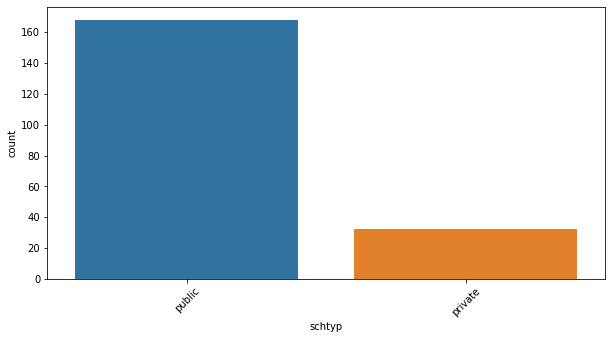

In [19]:
plt.figure(1, figsize=(10, 5))
sns.countplot(x=df["schtyp"])
plt.xticks(rotation = 45)
plt.show()

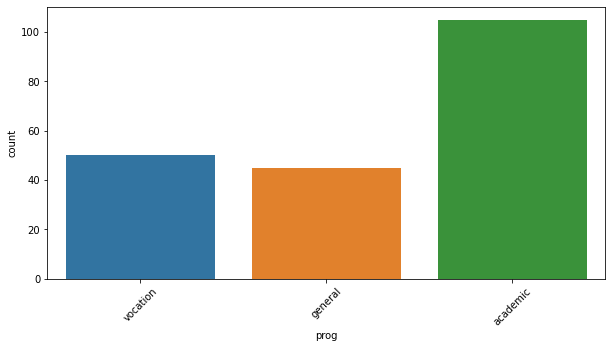

In [20]:
plt.figure(1, figsize=(10, 5))
sns.countplot(x=df["prog"])
plt.xticks(rotation = 45)
plt.show()

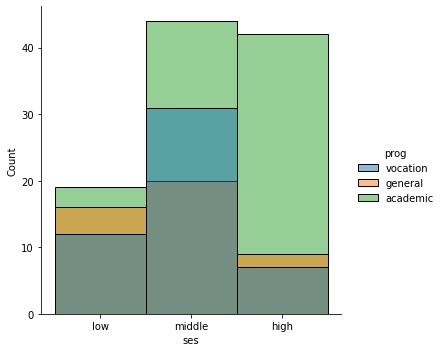

In [21]:
sns.displot(df, x="ses", hue="prog")

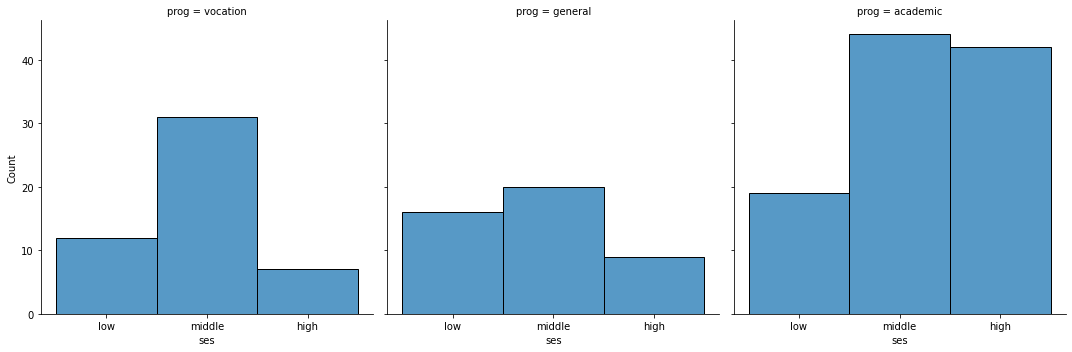

In [22]:
sns.displot(df, x="ses", col="prog")

In [23]:
df.columns

Index(['prog', 'female', 'ses', 'schtyp', 'read', 'write', 'math', 'science',
       'honors'],
      dtype='object')

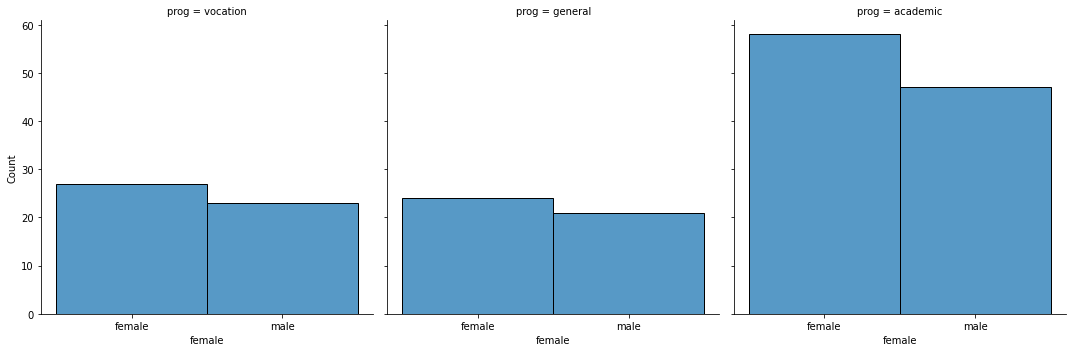

In [24]:
sns.displot(df,x='female',col='prog')

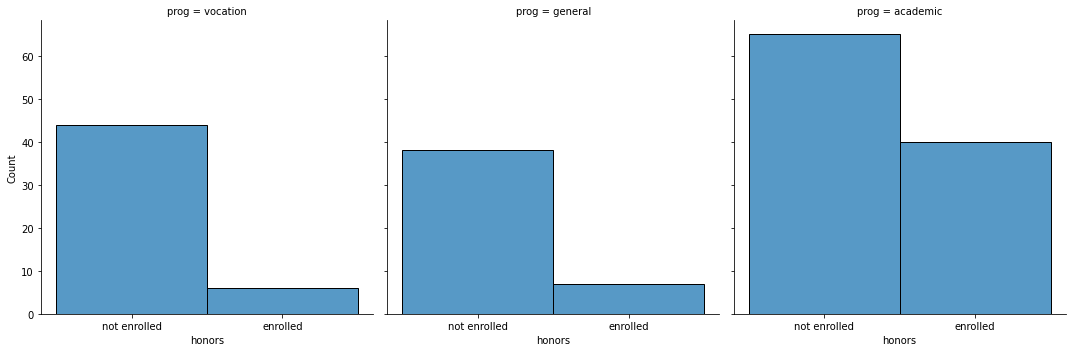

In [25]:
sns.displot(df,x='honors',col='prog')

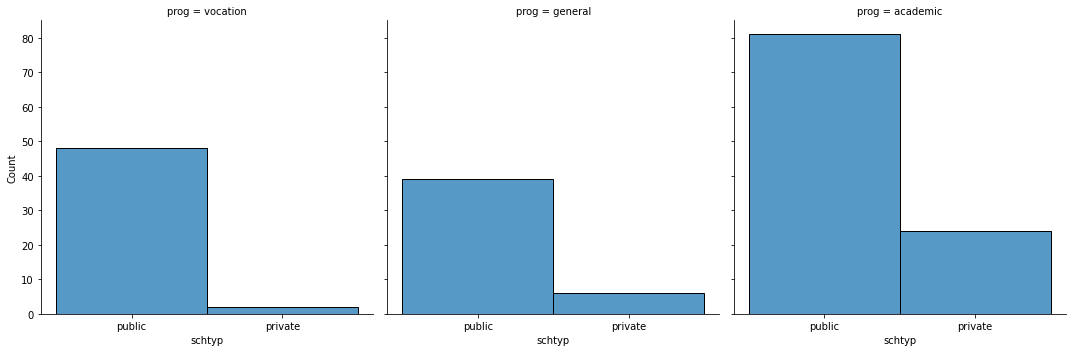

In [26]:
sns.displot(df,x='schtyp',col='prog')

* Majority of the programs are public sponsored.
* Majority of the students have enrolled for academic courses. 
* Middle socioeconomic students enrolled more for academic courses, high socioeconomic students also enrolled for academic courses, whereas the low socioeconomic students have significant numbers of all the three coureses. 
* Females have majority in all three courses.
* Majority of the students don't enroll for honors. 

Plotting the histograms of the variable to understand the distribution of the data. 

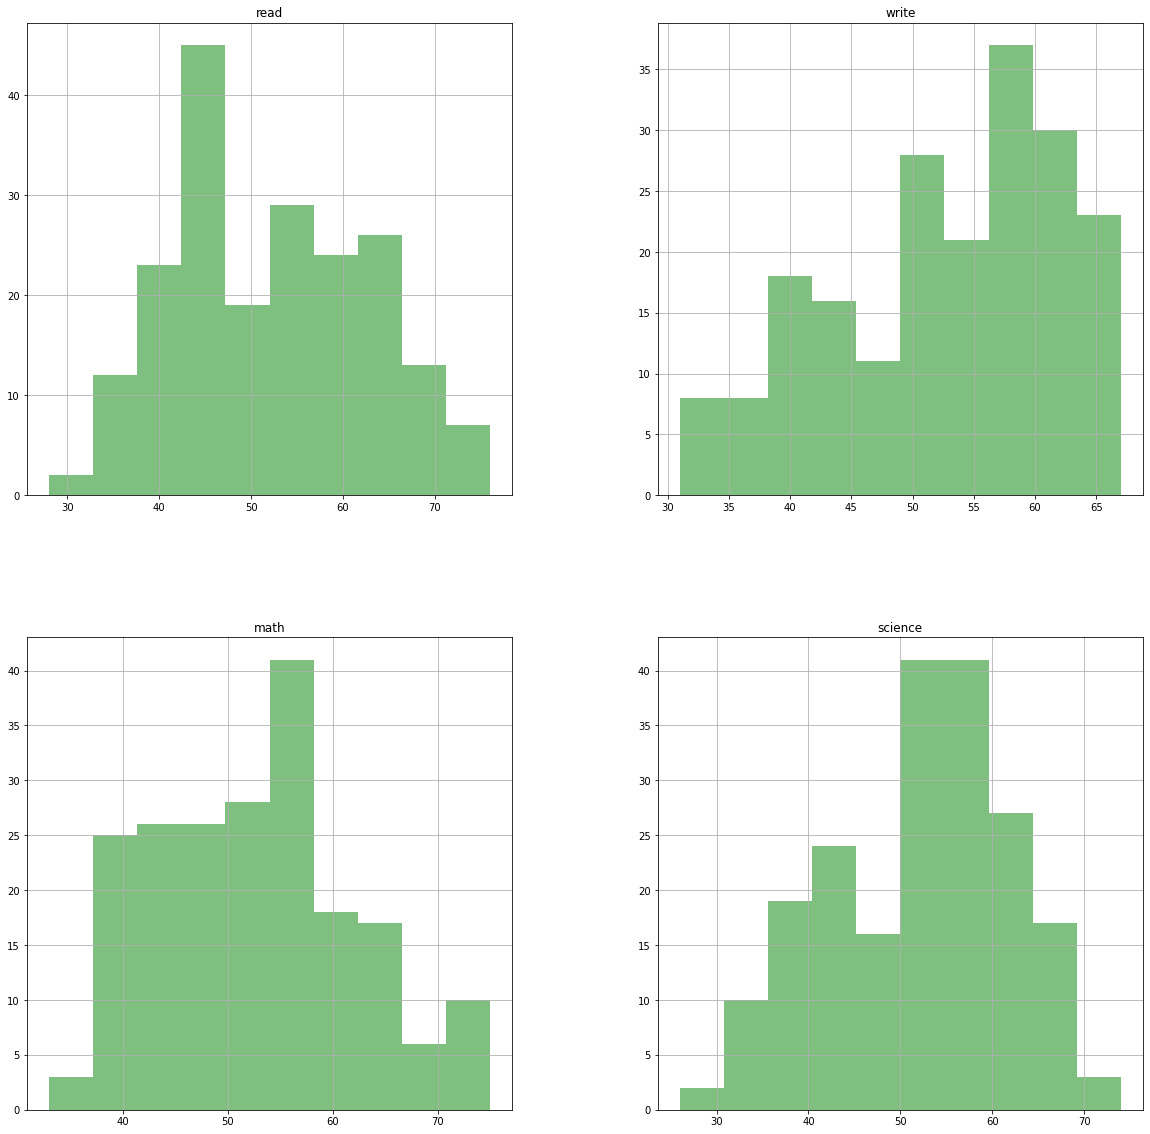

In [27]:
df.hist(alpha=0.5, figsize=(20, 20), color='green')
plt.show()

Plotting the pairplots to understand the bivariate analysis. 

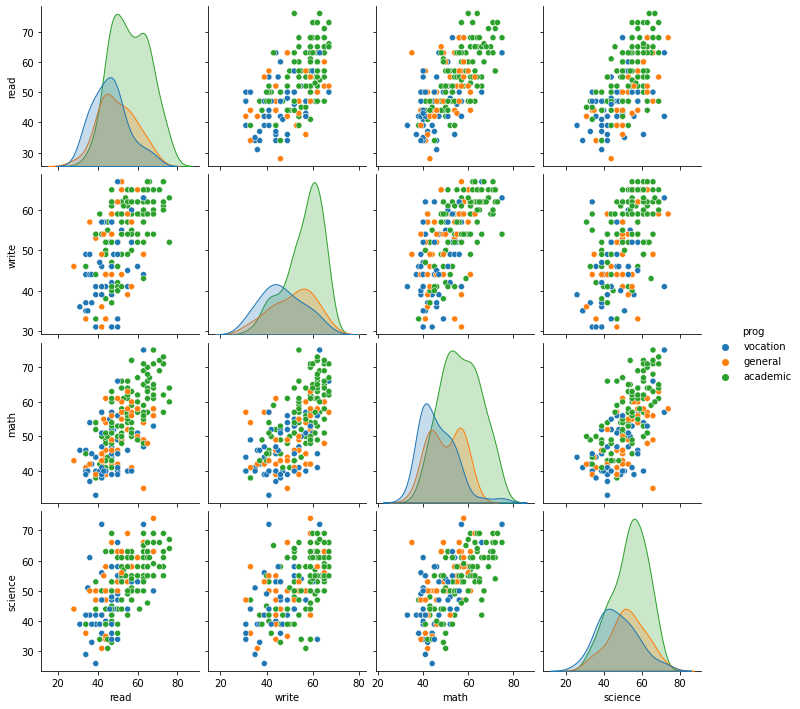

In [28]:
sns.pairplot(df.iloc[:, :],hue='prog')

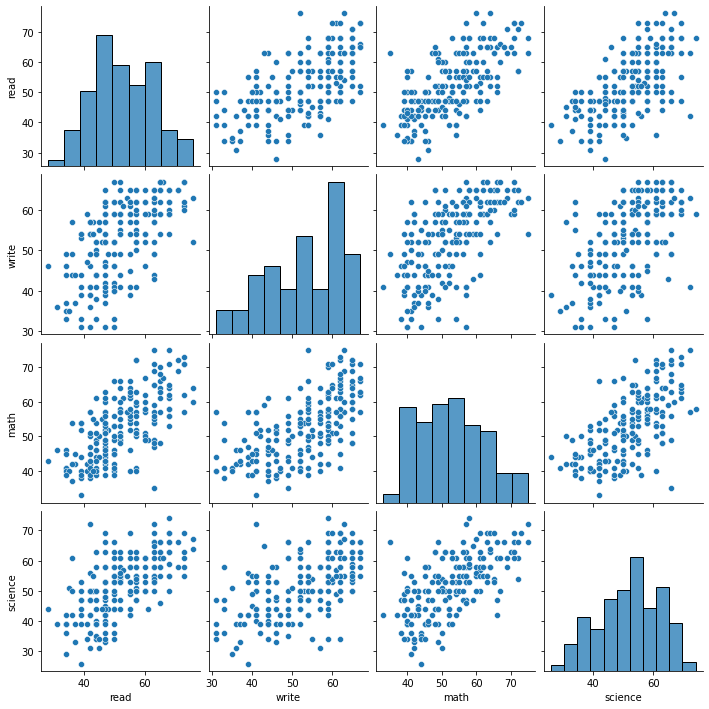

In [29]:
sns.pairplot(df.iloc[:, :])

Plotting the boxplots of the numerical variables. 

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='read'>

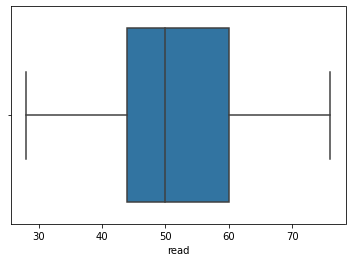

In [30]:
sns.boxplot(df["read"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='write'>

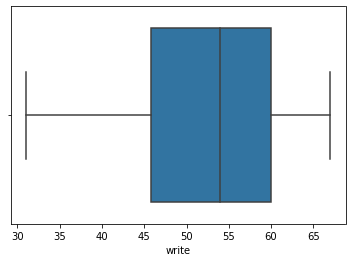

In [31]:
sns.boxplot(df["write"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='math'>

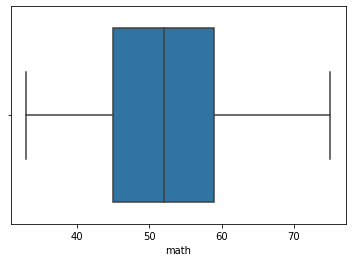

In [32]:
sns.boxplot(df["math"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='science'>

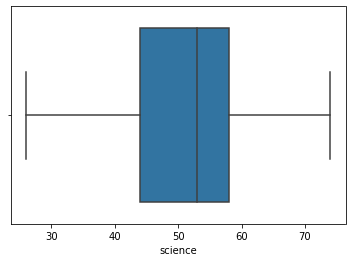

In [33]:
sns.boxplot(df["science"])

From the boxplots it is evident that there are no outliers. 

One Hot Encoding the categorical variable using the get dummies funciton after renaming the female variable to gender as it felt to be appropriate considering the records had both male and female. 

In [34]:
df.rename(columns={'female': 'gender'},inplace=True)
df.head()

,prog,gender,ses,schtyp,read,write,math,science,honors
0,vocation,female,low,public,34,35,41,29,not enrolled
1,general,male,middle,public,34,33,41,36,not enrolled
2,vocation,male,high,public,39,39,44,26,not enrolled
3,vocation,male,low,public,37,37,42,33,not enrolled
4,vocation,male,middle,public,39,31,40,39,not enrolled


In [35]:
df = pd.get_dummies(df, columns = ['gender', 'ses', 'schtyp','honors'],drop_first=True)
df.head()

,prog,read,write,math,science,gender_male,ses_low,ses_middle,schtyp_public,honors_not enrolled
0,vocation,34,35,41,29,0,1,0,1,1
1,general,34,33,41,36,1,0,1,1,1
2,vocation,39,39,44,26,1,0,0,1,1
3,vocation,37,37,42,33,1,1,0,1,1
4,vocation,39,31,40,39,1,0,1,1,1


Encoding the label variable. 

In [36]:
prog_mapper = {"general":1, "academic":2, "vocation":3}    
df["prog"] = df["prog"].replace(prog_mapper)
df.head()

,prog,read,write,math,science,gender_male,ses_low,ses_middle,schtyp_public,honors_not enrolled
0,3,34,35,41,29,0,1,0,1,1
1,1,34,33,41,36,1,0,1,1,1
2,3,39,39,44,26,1,0,0,1,1
3,3,37,37,42,33,1,1,0,1,1
4,3,39,31,40,39,1,0,1,1,1


__CORRELATION CHART__

<AxesSubplot:>

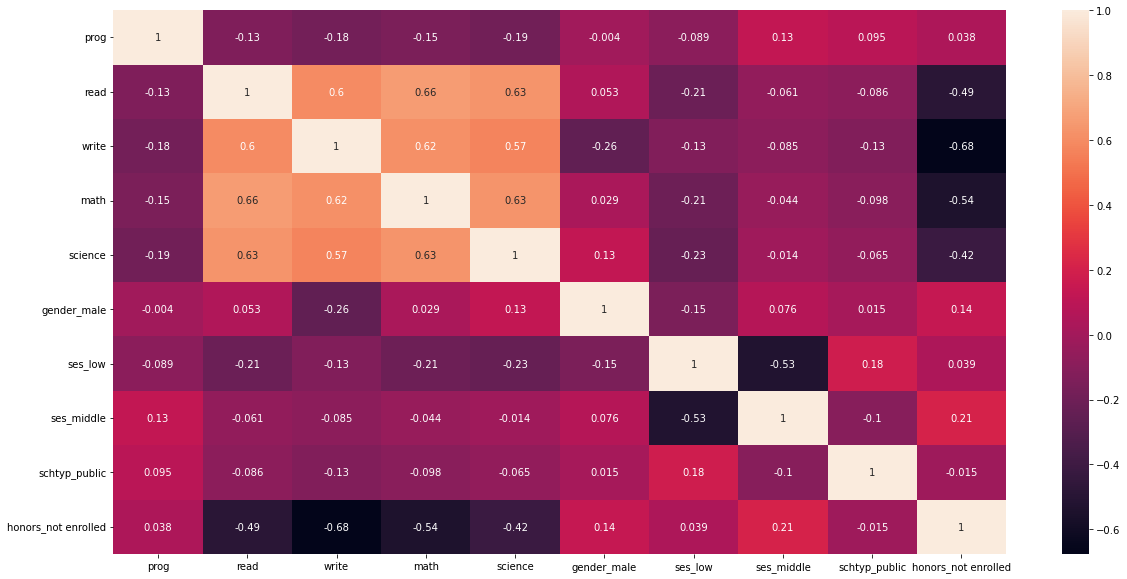

In [37]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

from the correlation chart it is clear that no variable has a very strong relation with the output variable

__TRAIN TEST SPLIT__

Using the train test split function to split the data into train and test dataset.

In [38]:
df_train, df_test = train_test_split(df, test_size = 0.3,random_state=457)

#### MODEL BUILDING

Importing the library required for building the model. 

In [39]:
from sklearn.linear_model import LogisticRegression

__Logistic Regression__

Fitting the model

In [40]:
model = LogisticRegression(multi_class = "multinomial", solver = "newton-cg",C= 0.95, penalty='none').fit(df_train.iloc[:, 1:], df_train.iloc[:, 0])

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Checking the parameters that can be tuned to get a better result, Initially was getting an accuracy of 55% but after tuning it improved to 63% so checking all the parameters of the model.

In [41]:
params = model.get_params()
print(params)

{'C': 0.95, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': None, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


Loading the libraries required for getting the accuracy scores of the model. 

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

__TEST DATASET__

Predicting the test dataset using the model. 

In [43]:
test_predict = model.predict(df_test.iloc[:, 1:]) 

__Accuracy Score__

In [44]:
accuracy_score(df_test.iloc[:,0], test_predict)

0.6333333333333333

__Confusion Matrix__

In [45]:
confmtrx = np.array(confusion_matrix(df_test.iloc[:,0], test_predict))
pd.DataFrame(confmtrx, index=['General','Academic', 'Vocation'],
columns=['predicted_General', 'predicted_Academic', 'predicted_Vocation'])

,predicted_General,predicted_Academic,predicted_Vocation
General,2,6,2
Academic,3,24,3
Vocation,2,6,12


__Classification Report__

In [46]:
print(classification_report(y_pred=test_predict, y_true=df_test.iloc[:,0]))

              precision    recall  f1-score   support

           1       0.29      0.20      0.24        10
           2       0.67      0.80      0.73        30
           3       0.71      0.60      0.65        20

    accuracy                           0.63        60
   macro avg       0.55      0.53      0.54        60
weighted avg       0.62      0.63      0.62        60



__TRAIN DATASET__

Predicting the output on the train dataset using the model. 

In [47]:
train_predict = model.predict(df_train.iloc[:, 1:]) 

__Accuracy Score__

In [48]:
accuracy_score(df_train.iloc[:,0], train_predict) 

0.65

__Confusion Matrix__

In [49]:
confmtrx = np.array(confusion_matrix(df_train.iloc[:,0], train_predict))
pd.DataFrame(confmtrx, index=['General','Academic', 'Vocation'],
columns=['predicted_General', 'predicted_Academic', 'predicted_Vocation'])

,predicted_General,predicted_Academic,predicted_Vocation
General,12,16,7
Academic,7,63,5
Vocation,6,8,16


__Classification Report__

In [50]:
print(classification_report(y_pred=train_predict, y_true=df_train.iloc[:,0]))

              precision    recall  f1-score   support

           1       0.48      0.34      0.40        35
           2       0.72      0.84      0.78        75
           3       0.57      0.53      0.55        30

    accuracy                           0.65       140
   macro avg       0.59      0.57      0.58       140
weighted avg       0.63      0.65      0.63       140



### CONCLUSION

The accuracy of the model is not good but both the train and test accuracies dont defer by much, in conclusion this model using the logistic regression is not a good model for this dataset. 